#Stroke Prediction 
### Using the Stroke Prediction Dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
Author: Georgia Kopalidi <br>
Notebook Developed as part of Masters' thesis project 

#Imports

In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score, roc_auc_score

#Loading Data

In [49]:
df = pd.read_csv('/content/drive/MyDrive/MSc/Data/StrokePrediction/strokeData.csv')

# Data Analysis 

An exploratory data analysis is carried to identify useful features among the dataset, as well as any correlations. 

In [50]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
df.shape

(5110, 12)

The dataframe consists of 5110 rows and 12 columns (categories)

In [53]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 NA values under the bmi category. <br>
Instead of removing all rows including NA values (and risking the removal of useful data), <br> these NA values can be replaced with the mean value of the bmi column.

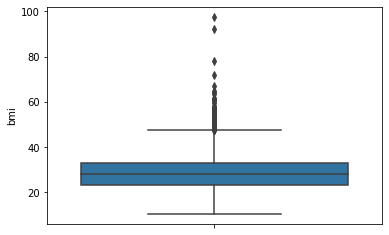

In [54]:
sns.boxplot(y=df["bmi"] )

Remove outliers, any value over 80

In [55]:
display(df[df['bmi'] > 80])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [56]:
df.drop(df.index[df['bmi'] > 80], inplace=True)
df = df.reset_index(drop = True)

In [57]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [58]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Visualising the data

Seaborn plots are created to visualise the distribution of values for each data column - type.

In [ ]:
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(13,10)})

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


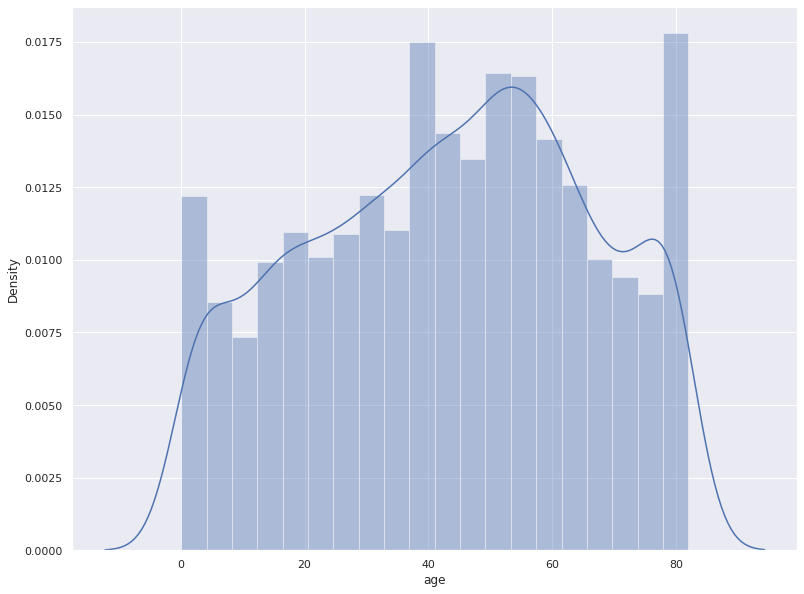

In [ ]:
ax = sns.distplot(df.age, label="Age", kde= True)
plt.show()

**Gender**

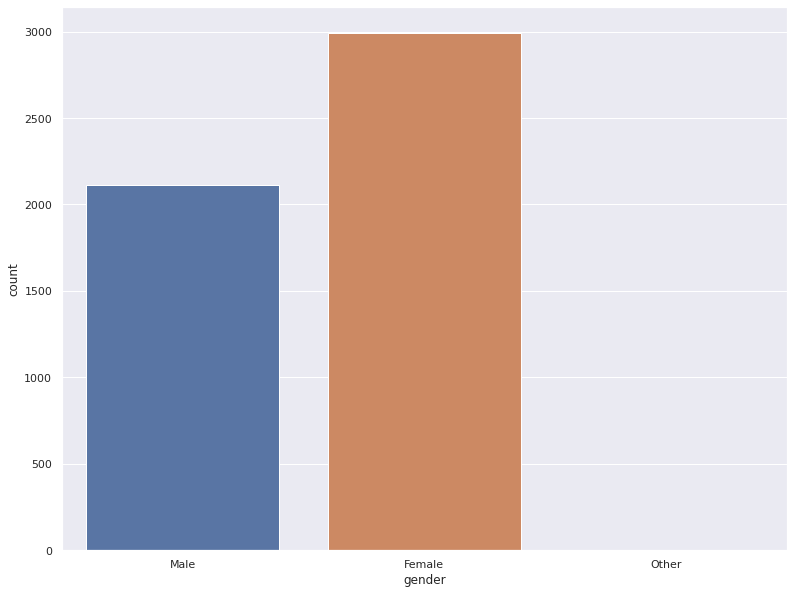

In [ ]:
ax = sns.countplot(data=df, x="gender")
plt.show()

**Whether they have hypertension or not**

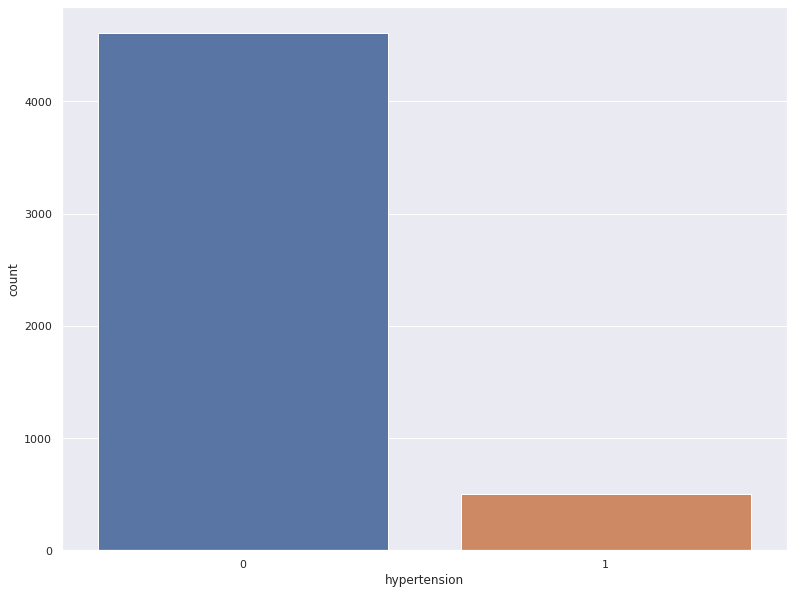

In [ ]:
ax = sns.countplot(data=df, x="hypertension")
plt.show()

**Marital Status**

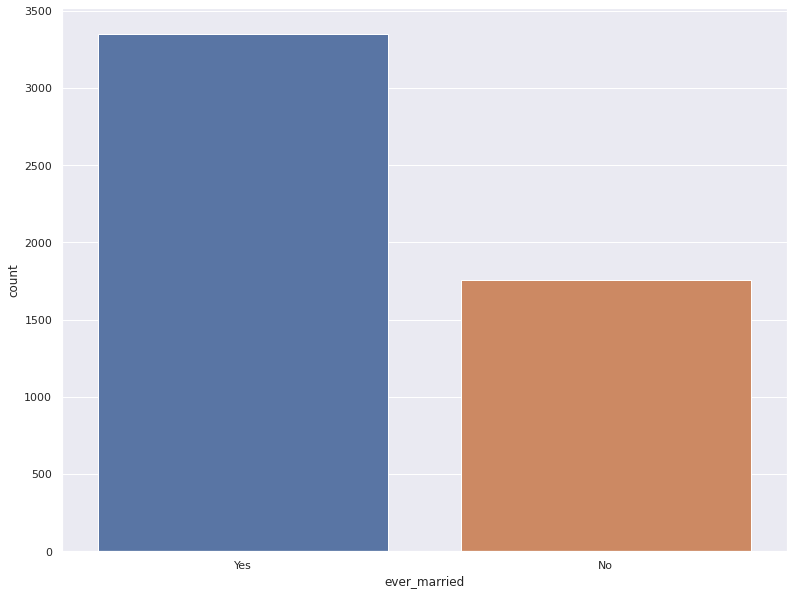

In [ ]:
ax = sns.countplot(data=df, x="ever_married")
plt.show()

**Type of work**

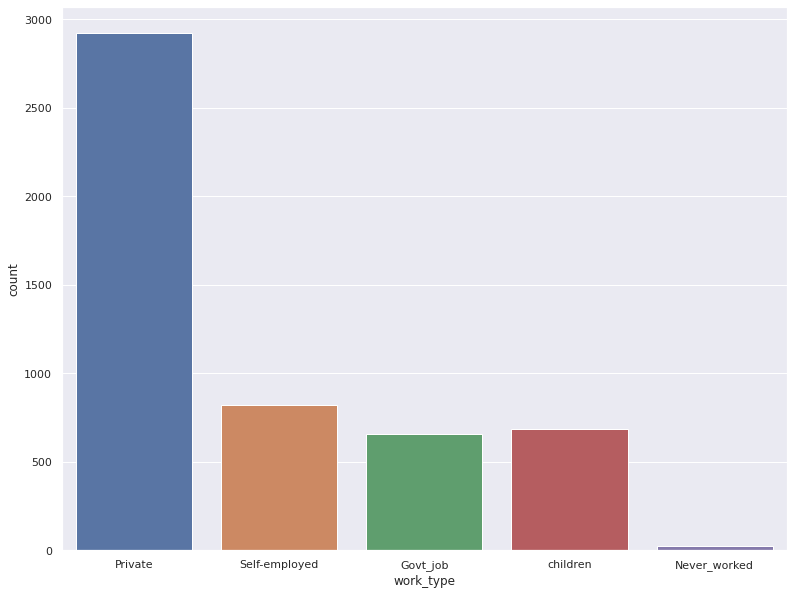

In [ ]:
ax = sns.countplot(data=df, x="work_type")
plt.show()

**Type of residency**

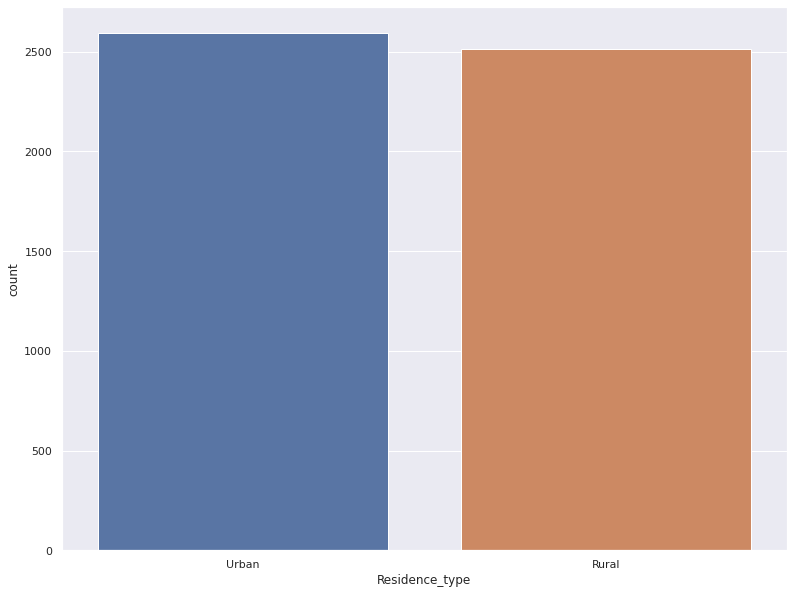

In [ ]:
ax = sns.countplot(data=df, x="Residence_type")
plt.show()

**Smoking Status**

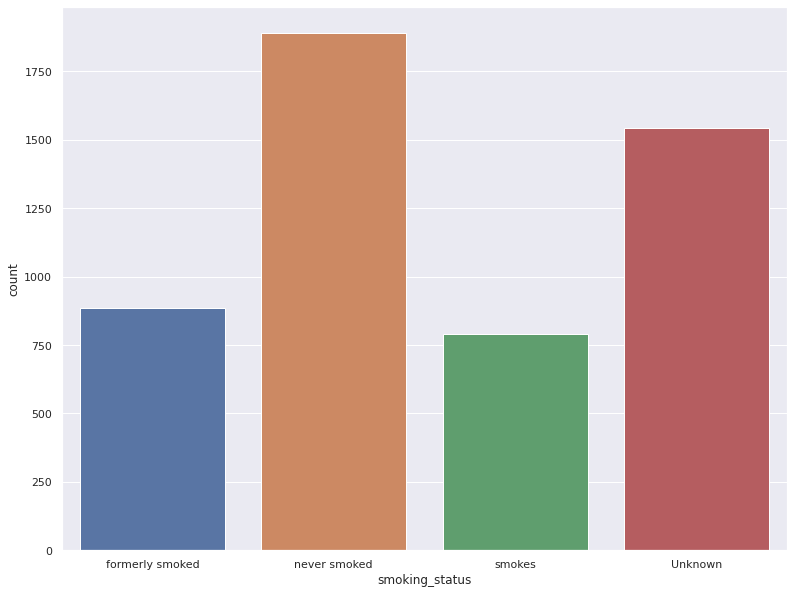

In [ ]:
ax = sns.countplot(data=df, x="smoking_status")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


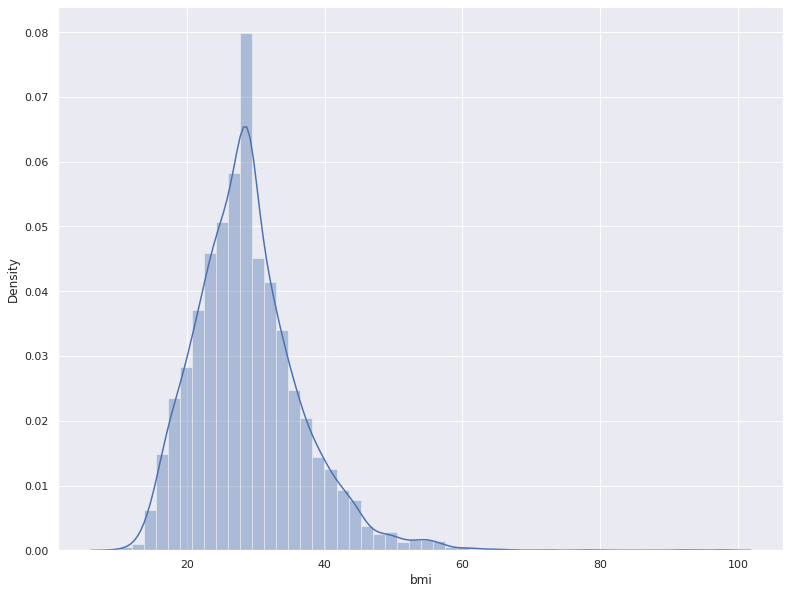

In [ ]:
ax = sns.distplot(df.bmi, label="bmi", kde= True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


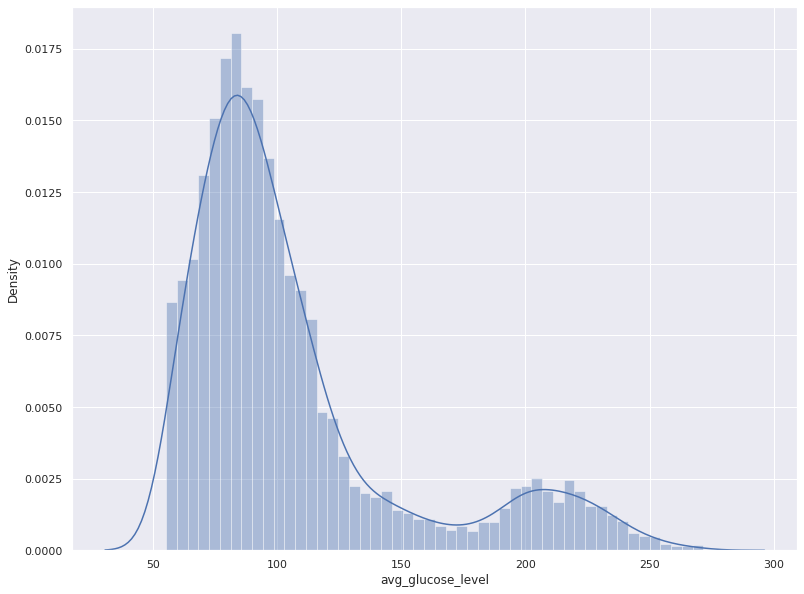

In [ ]:
ax = sns.distplot(df.avg_glucose_level, label="Average Glucose", kde= True)
plt.show()

**If they had a stroke or not**

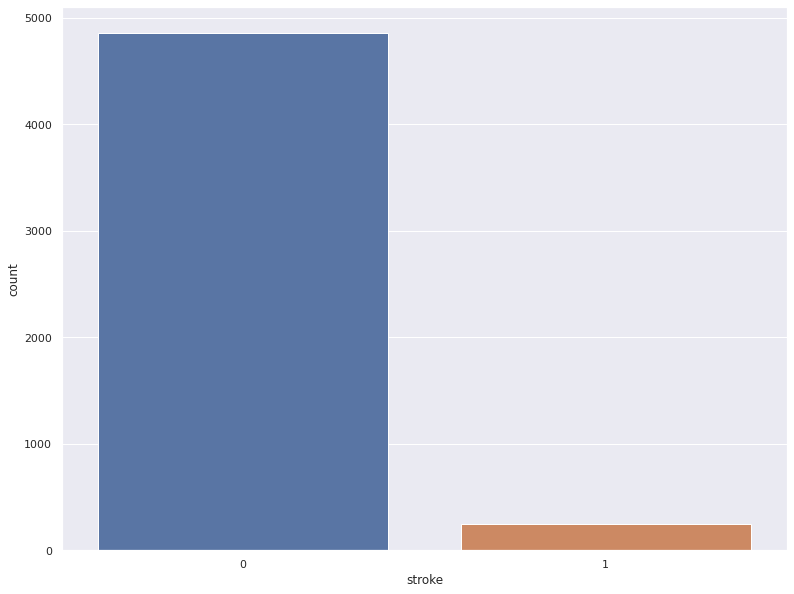

In [ ]:
ax = sns.countplot(data=df, x="stroke")
plt.show()

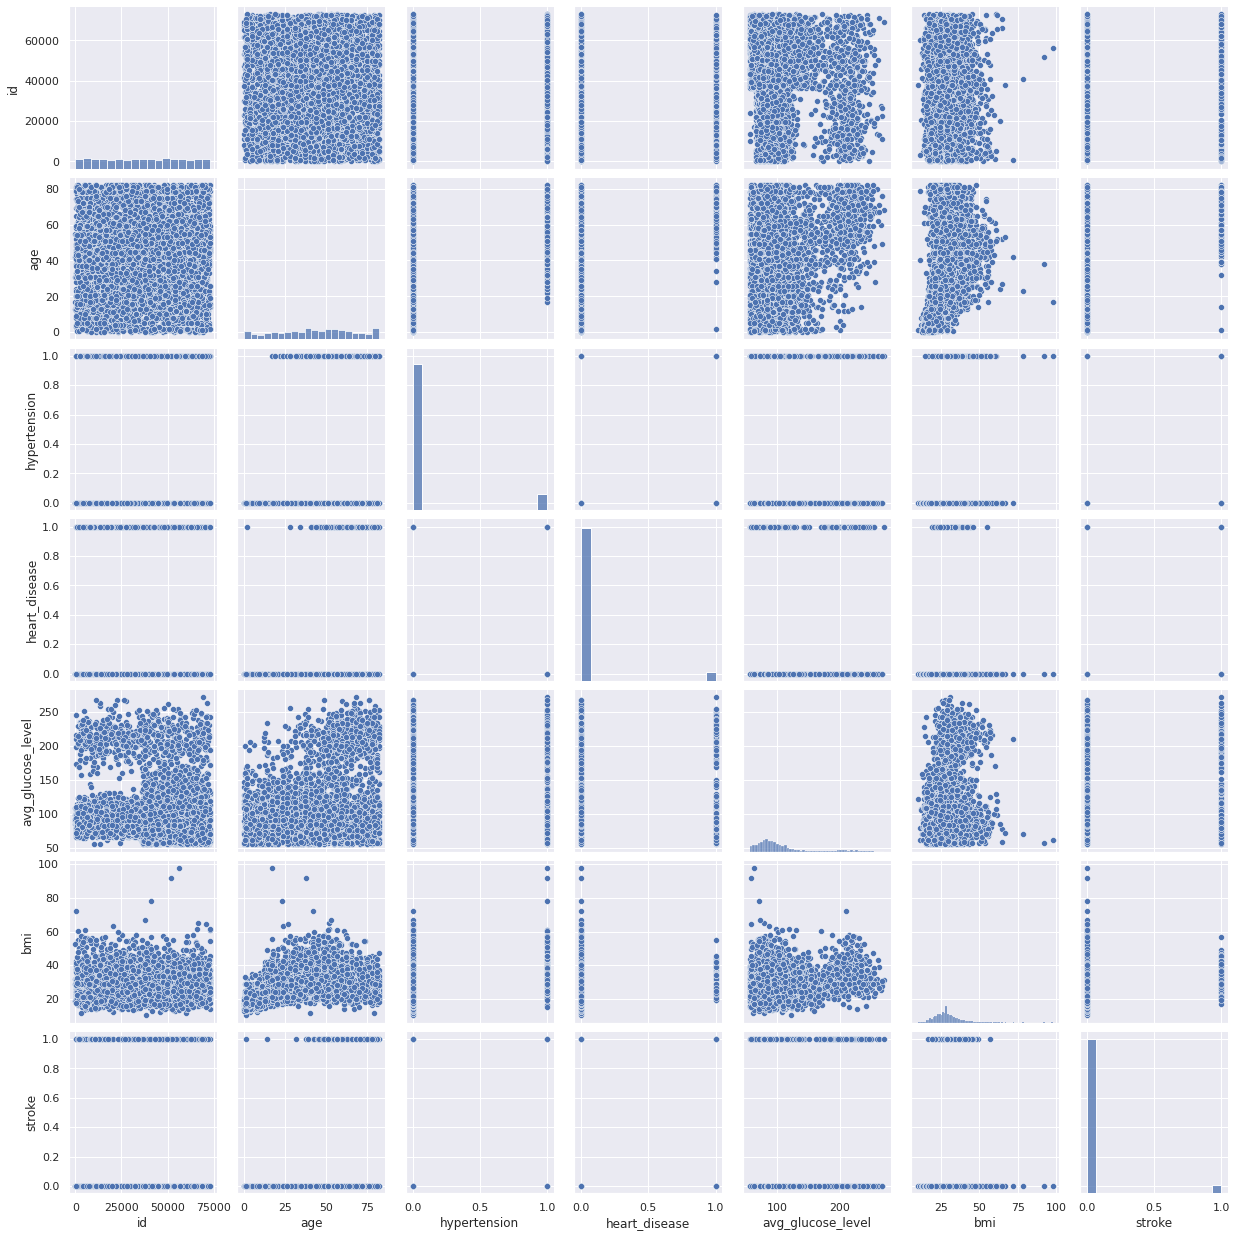

In [ ]:
ax = sns.pairplot(df)
plt.show()

## Feature Engineering

### Count the frequency of values for each category

**Age**

In [ ]:
# df["age"] = pd.cut(x=df['age'], bins=[0.0, 12.9, 17.9, 29.9, 39.9, 49.9, 59.9, 69.9, 79.9, np.inf], 
#                                           labels=["Child","Teenager","18 to 29","30s","40s","50s","60s","70s","80s +"])

In [59]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

**Gender Frequency**

In [60]:
df['gender'].value_counts()

Female    2994
Male      2113
Other        1
Name: gender, dtype: int64

Removing the single row of "Other".

In [61]:
df.drop(df.index[df['gender'] == 'Other'], inplace=True)
df = df.reset_index(drop = True)

In [62]:
df['smoking_status'].value_counts()

never smoked       1891
Unknown            1543
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

**Glucose Values**

[Blood Glucose Levels | What they mean](https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test)

In [63]:
df["avg_glucose_level"] = pd.cut(x=df['avg_glucose_level'], bins=[-np.inf, 99.9, 125,  np.inf], 
                                          labels=["Normal Levels", "Pre-Diabetes", "Diabetes"]) 

In [64]:
df['avg_glucose_level'].value_counts()

Normal Levels    3123
Diabetes          999
Pre-Diabetes      985
Name: avg_glucose_level, dtype: int64

**Body Mass Index (BMI)**

In [28]:
# df["bmi"] = pd.cut(x=df['bmi'], bins=[-np.inf, 18.49, 24.9, 29.9, 39.9, np.inf], 
#                                           labels=["Underweight", "Healthy", "Overweight", "Obese", "Severely Obese"]) 

In [65]:
df['bmi'].value_counts()

28.866375    201
28.700000     41
28.400000     38
27.700000     37
27.600000     37
            ... 
57.700000      1
51.800000      1
13.400000      1
56.000000      1
14.900000      1
Name: bmi, Length: 417, dtype: int64

**Hypertension (blood pressure higher than normal)** <br>
0: Do not have hypertension <br>
1: Do have hypertension

In [66]:
df['hypertension'].value_counts()

0    4611
1     496
Name: hypertension, dtype: int64

**Heart Disease**<br>
0: No
1: Yes

In [67]:
df['heart_disease'].value_counts()

0    4831
1     276
Name: heart_disease, dtype: int64

**Ever Married**

In [68]:
df['ever_married'].value_counts()

Yes    3352
No     1755
Name: ever_married, dtype: int64

**Work Type**

In [69]:
df['work_type'].value_counts()

Private          2922
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

**Residence Type**

In [70]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2511
Name: Residence_type, dtype: int64

**Smoking Status**

In [71]:
df['smoking_status'].value_counts()

never smoked       1891
Unknown            1543
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

# Data Encoding

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
ohe = OneHotEncoder()

In [76]:
df_encoding = ohe.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status']]).toarray()

In [77]:
enc_data = pd.DataFrame(columns = ohe.get_feature_names_out(), data = df_encoding)
enc_data = enc_data.astype(int)
df = pd.concat([df, enc_data] , axis=1)
df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status'], axis = 1, inplace=True)

In [79]:
df.head(10)

,id,age,hypertension,heart_disease,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_children,Residence_type_Rural,Residence_type_Urban,avg_glucose_level_Diabetes,avg_glucose_level_Normal Levels,avg_glucose_level_Pre-Diabetes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,36.600000,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,0
1,51676,61.0,0,0,28.866375,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,31112,80.0,0,1,32.500000,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,60182,49.0,0,0,34.400000,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
4,1665,79.0,1,0,24.000000,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5,56669,81.0,0,0,29.000000,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,0
6,53882,74.0,1,1,27.400000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
7,10434,69.0,0,0,22.800000,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
8,27419,59.0,0,0,28.866375,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
9,60491,78.0,0,0,24.200000,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


# Scaling Data

In [80]:
x = df.drop(['stroke'],axis=1)
y = df['stroke'].to_frame()

In [83]:
from sklearn import preprocessing

In [84]:
scaler = preprocessing.StandardScaler()

In [85]:
df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [86]:
df.head(10)

,id,age,hypertension,heart_disease,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,avg_glucose_level_Diabetes,avg_glucose_level_Normal Levels,avg_glucose_level_Pre-Diabetes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.297712,1.050908,-0.327977,4.183733,1.019096,-1.190354,1.190354,-0.723580,0.723580,-0.38424,...,-0.394246,-0.983492,0.983492,2.027834,-1.254629,-0.488837,-0.657982,2.185669,-0.766810,-0.427462
1,0.716828,0.785570,-0.327977,-0.239021,-0.000167,0.840086,-0.840086,-0.723580,0.723580,-0.38424,...,-0.394246,1.016785,-1.016785,2.027834,-1.254629,-0.488837,-0.657982,-0.457526,1.304104,-0.427462
2,-0.254952,1.625806,-0.327977,4.183733,0.478731,-1.190354,1.190354,-0.723580,0.723580,-0.38424,...,-0.394246,1.016785,-1.016785,-0.493137,-1.254629,2.045671,-0.657982,-0.457526,1.304104,-0.427462
3,1.118791,0.254895,-0.327977,-0.239021,0.729144,0.840086,-0.840086,-0.723580,0.723580,-0.38424,...,-0.394246,-0.983492,0.983492,2.027834,-1.254629,-0.488837,-0.657982,-0.457526,-0.766810,2.339391
4,-1.646511,1.581583,3.048995,-0.239021,-0.641537,0.840086,-0.840086,-0.723580,0.723580,-0.38424,...,-0.394246,1.016785,-1.016785,2.027834,-1.254629,-0.488837,-0.657982,-0.457526,1.304104,-0.427462
5,0.952779,1.670029,-0.327977,-0.239021,0.017444,-1.190354,1.190354,-0.723580,0.723580,-0.38424,...,-0.394246,-0.983492,0.983492,2.027834,-1.254629,-0.488837,-0.657982,2.185669,-0.766810,-0.427462
6,0.821076,1.360468,3.048995,4.183733,-0.193430,-1.190354,1.190354,-0.723580,0.723580,-0.38424,...,-0.394246,1.016785,-1.016785,-0.493137,0.797049,-0.488837,-0.657982,-0.457526,1.304104,-0.427462
7,-1.232120,1.139354,-0.327977,-0.239021,-0.799693,0.840086,-0.840086,1.382017,-1.382017,-0.38424,...,-0.394246,-0.983492,0.983492,-0.493137,0.797049,-0.488837,-0.657982,-0.457526,1.304104,-0.427462
8,-0.429470,0.697124,-0.327977,-0.239021,-0.000167,0.840086,-0.840086,-0.723580,0.723580,-0.38424,...,-0.394246,1.016785,-1.016785,-0.493137,0.797049,-0.488837,1.519798,-0.457526,-0.766810,-0.427462
9,1.133393,1.537360,-0.327977,-0.239021,-0.615178,0.840086,-0.840086,-0.723580,0.723580,-0.38424,...,-0.394246,-0.983492,0.983492,-0.493137,0.797049,-0.488837,1.519798,-0.457526,-0.766810,-0.427462


# Balancing the Data

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
x.shape

(5107, 23)

In [89]:
y.shape

(5107, 1)

In [46]:
sm = SMOTE(random_state=48)
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train.ravel())

In [47]:
x_train_balanced.shape

(7784, 10)

In [48]:
y_train_balanced.shape

(7784,)

# Train Test Data Split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=48)

In [92]:
print("x_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("x_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

x_train dataset:  (3574, 23)
y_train dataset:  (3574, 1)
x_test dataset:  (1533, 23)
y_test dataset:  (1533, 1)


In [100]:
y_train.value_counts()

stroke
0         3404
1          170
dtype: int64

In [103]:
sm = SMOTE(random_state= 48)
x_train_bl, y_train_bl = sm.fit_resample(x_train, y_train)

In [104]:
print("After SMOTE resampling x_train dataset: ", x_train_bl.shape)
print("After SMOTE resampling y_train dataset: ", y_train_bl.shape)

After SMOTE resampling x_train dataset:  (6808, 23)
After SMOTE resampling y_train dataset:  (6808, 1)


In [125]:
y_train_bl.value_counts()

stroke
0         3404
1         3404
dtype: int64

Now there are equal presentations of stroke, 3404 each.
The training data are now balanced.

# Models Building

## Decision Trees Model

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
tree_classifier = DecisionTreeClassifier(random_state=48)
tree_classifier.fit(x_train_bl, y_train_bl)

DecisionTreeClassifier(random_state=48)

**Training Accuracy**

In [128]:
tree_pred = tree_classifier.predict(x_train_bl)
tree_clf_report = pd.DataFrame(classification_report(y_train_bl, tree_pred, output_dict=True))

In [129]:
print(f"Accuracy Score: {accuracy_score(y_train_bl, tree_pred) * 100:.2f}%")
print(f"Classification Report: {tree_clf_report}")

Accuracy Score: 100.00%
Classification Report:                 0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3404.0  3404.0       1.0     6808.0        6808.0


In [130]:
print(f"Confusion Matrix: {confusion_matrix(y_train_bl, tree_pred)}")

Confusion Matrix: [[3404    0]
 [   0 3404]]


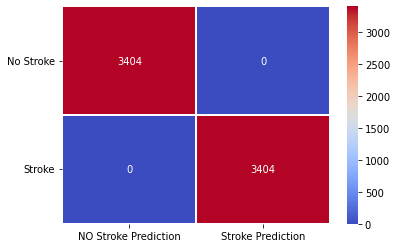

In [131]:
sns.heatmap(confusion_matrix(y_train_bl, tree_pred), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

**Testing Accuracy**

In [133]:
tree_pred_test = tree_classifier.predict(x_test)
tree_clf_test_report = pd.DataFrame(classification_report(y_test, tree_pred_test, output_dict=True))

In [134]:
print(f"Accuracy Score: {accuracy_score(y_test, tree_pred_test) * 100:.2f}%")
print(f"Classification Report: {tree_clf_test_report}")

Accuracy Score: 89.63%
Classification Report:                      0          1  accuracy    macro avg  weighted avg
precision     0.953749   0.122642  0.896282     0.538195      0.910920
recall        0.936039   0.164557  0.896282     0.550298      0.896282
f1-score      0.944811   0.140541  0.896282     0.542676      0.903364
support    1454.000000  79.000000  0.896282  1533.000000   1533.000000


**Weighted f1-score: 90.33%**

In [136]:
print(f"Confusion Matrix: {confusion_matrix(y_test, tree_pred_test)}")

Confusion Matrix: [[1361   93]
 [  66   13]]


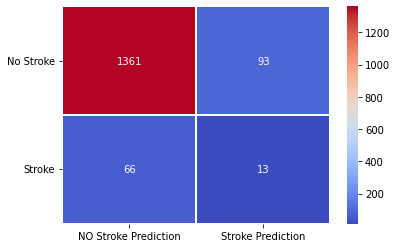

In [137]:
sns.heatmap(confusion_matrix(y_test, tree_pred_test), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

## Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf_classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 48)

In [109]:
rf_classifier.fit(x_train_bl, y_train_bl)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=48)

**Training accuracy**

In [110]:
rf_pred = rf_classifier.predict(x_train_bl)
rf_clf_report = pd.DataFrame(classification_report(y_train_bl, rf_pred, output_dict=True))

In [126]:
print(f"Accuracy Score: {accuracy_score(y_train_bl, rf_pred) * 100:.2f}%")
print(f"Classification Report: {rf_clf_report}")

Accuracy Score: 100.00%
Classification Report:                 0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3404.0  3404.0       1.0     6808.0        6808.0


In [113]:
print(f"Confusion Matrix: {confusion_matrix(y_train_bl, rf_pred)}")

Confusion Matrix: [[3404    0]
 [   0 3404]]


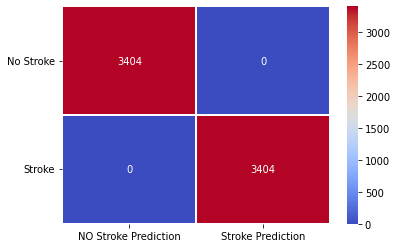

In [114]:
sns.heatmap(confusion_matrix(y_train_bl, rf_pred), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

**Testing Accuracy**

In [115]:
rf_pred_test = rf_classifier.predict(x_test)
rf_clf_test_report = pd.DataFrame(classification_report(y_test, rf_pred_test, output_dict=True))

In [116]:
print(f"Accuracy Score: {accuracy_score(y_test, rf_pred_test) * 100:.2f}%")
print(f"Classification Report: {rf_clf_test_report}")

Accuracy Score: 94.19%
Classification Report:                      0     1  accuracy    macro avg  weighted avg
precision     0.948129   0.0  0.941944     0.474064      0.899269
recall        0.993122   0.0  0.941944     0.496561      0.941944
f1-score      0.970104   0.0  0.941944     0.485052      0.920112
support    1454.000000  79.0  0.941944  1533.000000   1533.000000


**Weighted f1-score: 92.01%**

In [117]:
print(f"Confusion Matrix: {confusion_matrix(y_test, rf_pred_test)}")

Confusion Matrix: [[1444   10]
 [  79    0]]


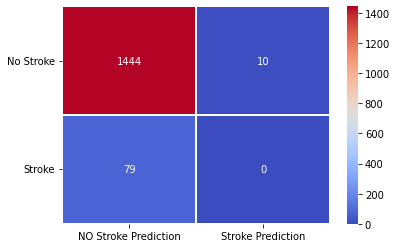

In [119]:
sns.heatmap(confusion_matrix(y_test, rf_pred_test), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

## XGBoost Model

In [149]:
from xgboost import XGBClassifier

In [150]:
xgb_classifier = XGBClassifier(random_state=48)
xgb_classifier.fit(x_train_bl, y_train_bl)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(random_state=48)

In [151]:
xgb_pred = xgb_classifier.predict(x_test)
xgb_prob = xgb_classifier.predict_proba(x_test)

In [152]:
print(f"Confusion Matrix: {confusion_matrix(y_test, xgb_pred)}")

Confusion Matrix: [[1443   11]
 [  76    3]]


In [155]:
print(f"Classification Report:\n {classification_report(y_test, xgb_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1454
           1       0.21      0.04      0.06        79

    accuracy                           0.94      1533
   macro avg       0.58      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



**Weighted f1-score: 92%**

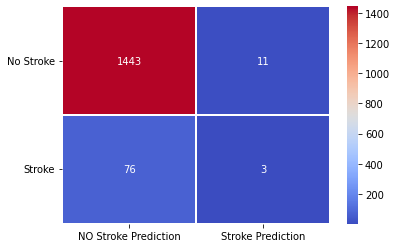

In [153]:
sns.heatmap(confusion_matrix(y_test, xgb_pred), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

## Logistic Regression Model

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lg = LogisticRegression(solver = 'liblinear', random_state = 48)

In [159]:
lg.fit(x_train_bl, y_train_bl)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=48, solver='liblinear')

**Training Accuracy**

In [160]:
lg_pred = lg.predict(x_train_bl)

In [162]:
print(f"Classification Report:\n {classification_report(y_train_bl, lg_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      3404
           1       0.98      0.92      0.95      3404

    accuracy                           0.95      6808
   macro avg       0.95      0.95      0.95      6808
weighted avg       0.95      0.95      0.95      6808



In [165]:
print(f"Confusion Matrix: {confusion_matrix(y_train_bl, lg_pred)}")

Confusion Matrix: [[3328   76]
 [ 269 3135]]


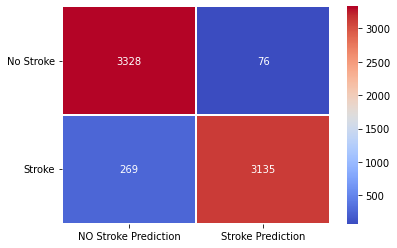

In [166]:
sns.heatmap(confusion_matrix(y_train_bl, lg_pred), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

**Testing Accuracy**

In [163]:
lg_pred_test = lg.predict(x_test)

In [167]:
print(f"Classification Report:\n {classification_report(y_test, lg_pred_test)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1454
           1       0.17      0.11      0.14        79

    accuracy                           0.93      1533
   macro avg       0.56      0.54      0.55      1533
weighted avg       0.91      0.93      0.92      1533



**Weighted f1-score: 92%**

In [168]:
print(f"Confusion Matrix: {confusion_matrix(y_test, lg_pred_test)}")

Confusion Matrix: [[1411   43]
 [  70    9]]


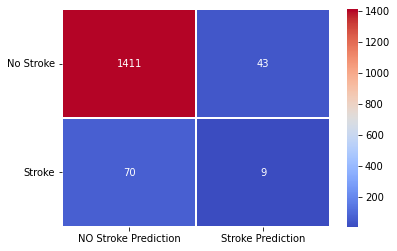

In [169]:
sns.heatmap(confusion_matrix(y_test, lg_pred_test), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

## SVC (Support Vector Classifier) Model

In [170]:
from sklearn.svm import SVC

In [172]:
svc = SVC(kernel='linear', probability=True, random_state=48)

In [173]:
svc.fit(x_train_bl, y_train_bl)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True, random_state=48)

**Training Accuracy**

In [174]:
svc_pred = svc.predict(x_train_bl)

In [175]:
print(f"Classification Report:\n {classification_report(y_train_bl, svc_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      3404
           1       0.77      0.88      0.82      3404

    accuracy                           0.81      6808
   macro avg       0.82      0.81      0.81      6808
weighted avg       0.82      0.81      0.81      6808



In [176]:
print(f"Confusion Matrix: {confusion_matrix(y_train_bl, svc_pred)}")

Confusion Matrix: [[2536  868]
 [ 422 2982]]


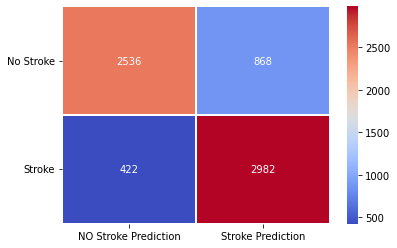

In [178]:
sns.heatmap(confusion_matrix(y_train_bl, svc_pred), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

**Testing Accuracy**

In [179]:
svc_pred_test = lg.predict(x_test)

In [180]:
print(f"Classification Report:\n {classification_report(y_test, svc_pred_test)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1454
           1       0.17      0.11      0.14        79

    accuracy                           0.93      1533
   macro avg       0.56      0.54      0.55      1533
weighted avg       0.91      0.93      0.92      1533



**Weighted f1-score: 92%**

In [181]:
print(f"Confusion Matrix: {confusion_matrix(y_test, svc_pred_test)}")

Confusion Matrix: [[1411   43]
 [  70    9]]


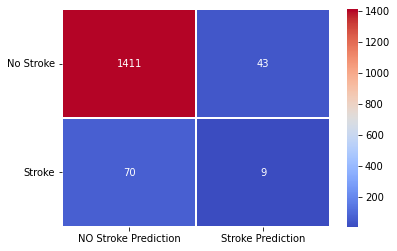

In [182]:
sns.heatmap(confusion_matrix(y_test, svc_pred_test), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

## KNN (K - Nearest Neighbours) Model

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn_cl = KNeighborsClassifier(metric='euclidean')

In [185]:
knn_cl.fit(x_train_bl, y_train_bl)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

**Training Accuracy**

In [186]:
knn_pred = knn_cl.predict(x_train_bl)

In [187]:
print(f"Classification Report:\n {classification_report(y_train_bl, knn_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.82      3404
           1       0.80      0.88      0.84      3404

    accuracy                           0.83      6808
   macro avg       0.83      0.83      0.83      6808
weighted avg       0.83      0.83      0.83      6808



In [188]:
print(f"Confusion Matrix: {confusion_matrix(y_train_bl, knn_pred)}")

Confusion Matrix: [[2679  725]
 [ 418 2986]]


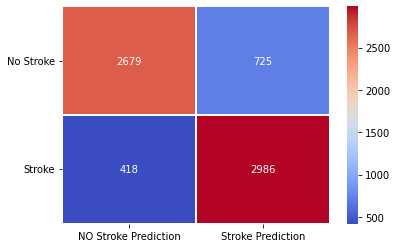

In [189]:
sns.heatmap(confusion_matrix(y_train_bl, knn_pred), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

**Testing Accuracy**

In [190]:
knn_pred_test = knn_cl.predict(x_test)

In [191]:
print(f"Classification Report:\n {classification_report(y_test, knn_pred_test)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78      1454
           1       0.06      0.39      0.10        79

    accuracy                           0.65      1533
   macro avg       0.51      0.53      0.44      1533
weighted avg       0.91      0.65      0.75      1533



**Weighted f1-score: 75%**

In [192]:
print(f"Confusion Matrix: {confusion_matrix(y_test, knn_pred_test)}")

Confusion Matrix: [[965 489]
 [ 48  31]]


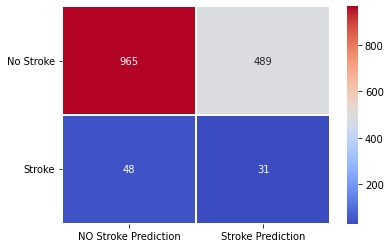

In [193]:
sns.heatmap(confusion_matrix(y_test, knn_pred_test), cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

# XAI - Explaining the models

According to the models' evaluations above, Randome Forest has performed the best. <br>
A thourough explanation of the model decision process will take place using XAI algorithms.

## Shapley Values (SHAP)

In [195]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.0 MB/s 


In [196]:
import shap

In [201]:
shap_explainer = shap.TreeExplainer(rf_classifier)
shap_values = shap_explainer.shap_values(x_test)

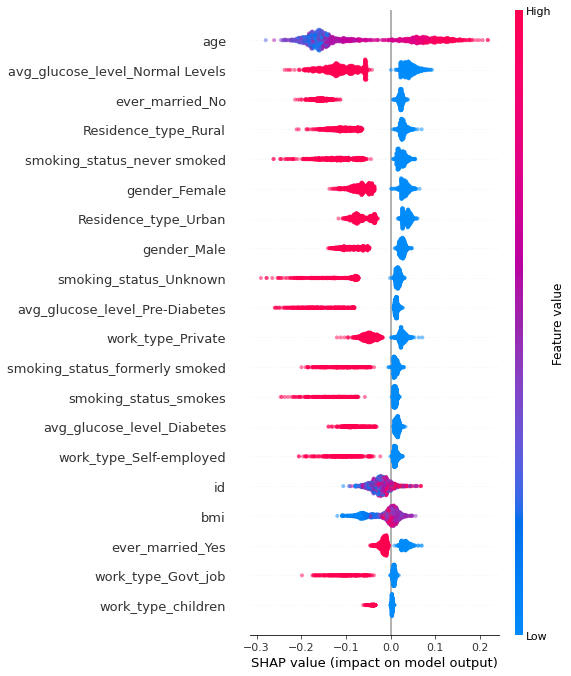

In [203]:
shap.summary_plot(shap_values[1], x_test, alpha=0.5)